## Assignment 2 - Epipolar Geometry and 3D Reconstruction

First name: Marcel
<br>
Last name: Zauder
<br>
Matriculation number: 16-124-836

In [193]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole, plot_epipolar_line
from utils import get_normalization_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part I: The Eight Point Algorithm

### Load Data

In [194]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Compute Test Normalization Matrix

In [195]:
print(get_normalization_matrix(x1))

218.0934335018194
[1.11022302e-16 1.63628800e-16 1.00000000e+00]
[[ 0.00458519  0.         -2.47824548]
 [ 0.          0.00458519 -1.16055738]
 [ 0.          0.          1.        ]]


### Estimate the fundamental matrix F

In [196]:
F = eight_points_algorithm(x1, x2) 
assert np.linalg.matrix_rank(F) == 2
print('Estimated fundamental matrix: ')
print(F)

218.0934335018194
[1.11022302e-16 1.63628800e-16 1.00000000e+00]
223.87322797215484
[2.84010541e-16 1.03276560e-16 1.00000000e+00]
Estimated fundamental matrix: 
[[ 3.09948088e-11  0.00000000e+00 -1.67523553e-08]
 [ 0.00000000e+00 -4.36902876e-08  1.10584463e-05]
 [-1.68916634e-08  1.14834787e-05 -2.89745291e-03]]


### Plot epipoles and epipolar lines

In [197]:
# compute the epipole
# TODO: implement this function
e = right_epipole(F)  

(3, 1)
[[0.90561492]
 [0.42409765]
 [0.00167555]]


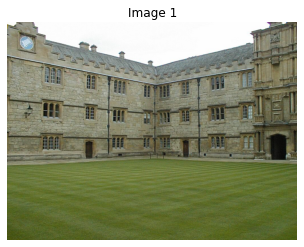

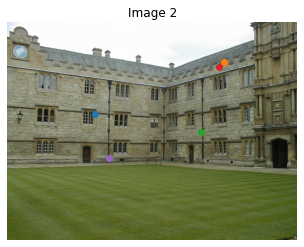

In [198]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e)

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [199]:
%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)

fig2, ax2 = plt.subplots()
ax2.imshow(img2)

def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
    ax2.imshow(img2)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>